<a href="https://colab.research.google.com/github/Nellaapriliaa/MachineLearningTasks/blob/main/TUGAS%209/Nella_Aprilia_1103210185_BinaryClassificationNNHousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Nella Aprilia

NIM: 1103210185

Tugas 9: Binary Classsification Using Neural Network

Dataset : housepricedata.csv

Dokumentasi ChatGPT : https://chatgpt.com/share/5fc38485-6ec4-4d04-bd9a-0d97037406d5

**Connect Google Colab to Google Drive**

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


**Import library**

In [ ]:
import pandas as pd
import numpy as n
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import accuracy_score

**Read DataSet**

In [ ]:
import pandas as pd

# Read the dataset into a Pandas DataFrame
file_path = ('/content/drive/MyDrive/Dataset/housepricedata.csv')

# Read teh CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Now you can work with the DataFrame
df.head() # Display the first few rows of the DataFrame


,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


**Binary Classification NN House Price**

In [ ]:
# Assuming df is your DataFrame containing the dataset

# Define feature columns and target column
feature_columns = ['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea']
target_column = 'AboveMedianPrice'

# Extract features and target
X = df[feature_columns]
y = df[target_column]

# Normalize feature columns
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.5, random_state=42)

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=0)

# History model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

print("\n\n")

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')



Epoch 1/100
16/16 [==============================] - 0s 10ms/step - loss: 0.3794 - accuracy: 0.8630 - val_loss: 0.3607 - val_accuracy: 0.8748
Epoch 2/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3781 - accuracy: 0.8611 - val_loss: 0.3589 - val_accuracy: 0.8728
Epoch 3/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3771 - accuracy: 0.8611 - val_loss: 0.3580 - val_accuracy: 0.8787
Epoch 4/100
16/16 [==============================] - 0s 8ms/step - loss: 0.3753 - accuracy: 0.8630 - val_loss: 0.3556 - val_accuracy: 0.8748
Epoch 5/100
16/16 [==============================] - 0s 9ms/step - loss: 0.3743 - accuracy: 0.8669 - val_loss: 0.3539 - val_accuracy: 0.8767
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.3719 - accuracy: 0.8611 - val_loss: 0.3533 - val_accuracy: 0.8806
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.3710 - accuracy: 0.8611 - val_loss: 0.3514 - val_accuracy: 0.8787
Epoch 8/100


**Visualize**

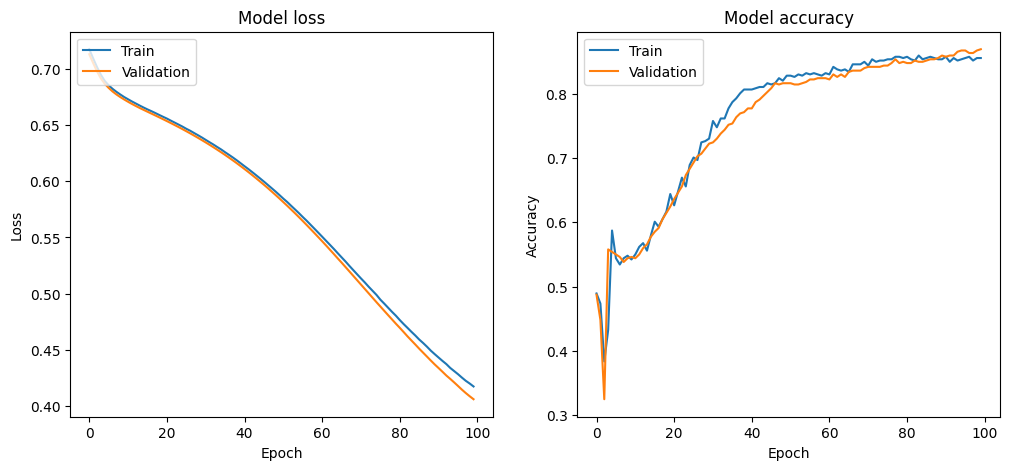

In [ ]:
# Visualize loss and accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()